![unpackai](img/unpackai.png)

# 🤖Automate Excel with Python🐍

---

# Introduction

In this workshop, we will show how to manipulate Excel with Python.

For that, we will need:

* **Excel**
* **Anaconda**: it will provide
  - **Python**
  - `xlwings`: a package to manipulate Excel)
  - `pandas`: a package to manipulate Data)
  - `jupyter`: convenient write code and explore what it does)
* (optionally) **VS Code**: a super cool and free editor made by Microsoft


## Python & Anaconda

Python is a general-purpose coding language that is used across many web development and information technology jobs to complete a variety of programming tasks.

![SO Survey 2021 Most Wanted Languages](img/SO_survey2021_most_wanted_languages.png)

### Anaconda

* Distribution of the Python and R programming languages for
scientific computing, data science, machine learning, etc.
* Aims to simplify package management and deployment
(i.e. everything is provided in the installer and can install easily packages)
* Installer includes  many libraries essential to data science and ML (so it's heavier than Python from Python.org)

In particular, it includes `pandas`, `jupyter`, and `xlwings` that we will be using today.

### Jupyter


Jupyter is a kind of application that allows editing and running notebook documents via a web browser.

**Jupyter Notebooks** (extension `.ipynb`):

* Notebook-based code editor
* Usually run in web browser (but can run in IDE like Visual Studio Code)
* Mix code + text + visualization (e.g. graphs or tables)
* Useful when doing research / exploration (e.g. data science)

What you are currently look at is a Jupyter Notebook

A notebook is composed of 3 types of elements:

* **cells of text** in Markdown language (like this block of text)
* **cells of Python code** (like what is below)
* **results of code cells** (the result of running the code)

In [40]:
variable = 10
variable + 5

15

Jupyter will display the value of the element in the last line of code ... for example:

In [41]:
"Hello " + "You!"

'Hello You!'

You can "run" cells with code (i.e. execute the code) in different ways:

* Click on the "Play" icon ▶️ (top left of cell in VS Code ... or in the toolbar in Jupyter)
* <kbd>Shift</kbd> + <kbd>ENTER</kbd> to run the cell and move to the next cell
* <kbd>Ctrl</kbd> + <kbd>ENTER</kbd> (<kbd>Cmd</kbd> + <kbd>ENTER</kbd> on Mac) to just run the cell


### Pandas

* `Pandas` is THE package for easy and fast manipulation of tables of data.
* Excel has Worksheets, `pandas` has `DataFrame`
* Extraction and combination of data is quick, easy, and can be done in few lines of code

We will be using `pandas` to manipulate data retrieved from Excel.

### Few words about Python Syntax

1. We can add **comments** to explain what we do  (`# ...`)
2. **Variables** are used to store and re-use values (`some_name = ... `)
3. We can show values, messages, variables with `print(...)`
4. We can create **functions** when we want to re-use the same code several times with only small variations <br>
  (`def name_of_my_function( ... )`)
5. We can insert code and variables into "strings" (i.e. text) with the powerful **f-string** (`f"value={variable}"`)
6. We can re-use code written by some other people (called "packages") with an `import`

In [7]:
import random  # [5] import package with functions for random numbers


def hello(name):  # [4] define a function with a parameter "name"
    """Say hello to someone"""
    print(f"Hello {name}")  # [5] using f-string to print a string with the value of "name"


print("Hi!")  # [3] print a message in output of the cell
hello("me")  # [4] call the function and print "Hello me!"

you = "You!"  # [2] define a variable
hello(you)  # [2] use the variable and print "Hello You!"

# [1] Since the random number is the last line of the cell, it will display in the output of the cell
random.randint(1, 10)  # [6] Random number between 1 and 10


Hello me
Hello You!


10

## Different python packages for Excel 

| Package | Focus | Free | In Anaconda | Difficulty | Read | Write | Rich text | Run without Excel | Edition live | Integration with VBA | Create Addin | User-Defined Functions |
|---|---|---|---|---|---|---|---|---|---|---|---|---|
| [panda](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_spreadsheets.html?highlight=excel#excel-files) | Just reading / writing tabular data | ✔️ | ✔️ | 😎Easy | data only | data only | ❌ | ✔️ | ❌ | ❌ | ❌ | ❌ |
| [openpyxl](https://openpyxl.readthedocs.io/) | Read-Write Excel 2010+ files (xlsx) without need of Excel | ✔️ | ❌ | 😀OK | ✔️ | ✔️ | ❌ | ✔️ | ❌ | ❌ | ❌ | ❌ |
| [xlsxwriter](https://xlsxwriter.readthedocs.io/) | Powerful writer of Excel files without need of Excel | ✔️ | ✔️ | 😀OK | ❌ | ✔️ | ✔️ | ✔️ | ❌ | ❌ | ❌ | ❌ |
| [pywin32](https://www.blog.pythonlibrary.org/2010/07/16/python-and-microsoft-office-using-pywin32/) | Manipulate Visual Basic / VBA in Windows (code is close to VBA) | ✔️ | ✔️Windows | 😖Hard | ✔️ | ✔️ | ✔️ | ❌ | ✔️ | ✔️ | ?? | ?? |
| [pyxll](https://www.pyxll.com/) | Integrate easily and efficiently Python in Excel | ❌ | ❌ | 😀OK | ✔️ | ✔️ | ✔️ | ❌ | ✔️ | ✔️ | ✔️ | ✔️ |
| [xlwings](https://www.xlwings.org/) | Integrate Python in Excel | ✔️ | ✔️ | 😀OK | ✔️ | ✔️ |  💲Pro Version | ❌ | ✔️ | ✔️ | ✔️ | ✔️Windows|

# Using Xlwings to manipulate Data

🔔 Don't forget to runn the cell below 

In [9]:
import pandas as pd
import xlwings as xw

XLSX_PATH = "rating_anime.xlsx"

Before we start, we will copy **rating_anime__ORIGINAL.xls** to **rating_anime.xlsx** 

In [11]:
# 🏃‍♂️ [OPTIONAL]
import shutil

shutil.copy("rating_anime__ORIGINAL.xlsx", XLSX_PATH)

'rating_anime.xlsx'

📂Now, you can **open "rating_anime.xlsx"** and split your screen to display both Jupyter and Excel.

You can either open manually or run the cell below that will open a file using Python.

In [12]:
# 🏃‍♂️ [OPTIONAL]
import os
import subprocess
import sys

if sys.platform.startswith("darwin"):  # OS-X
    subprocess.call(["open", XLSX_PATH])
elif os.name == "nt":  # Windows
    os.startfile(XLSX_PATH)
elif os.name == "posix":  # Linux
    subprocess.call(["xdg-open", XLSX_PATH])

print("Now split your screen to show both Excel and Jupyter")

Now split your screen to show both Excel and Jupyter


# Reading data stored in Excel and merge with other data

We will start with an Excel that contains ratings of several users for some anime provided as "id" (`anime_id`).

This is what we will do:

1. Reading Excel and storing into a Panda DataFrame
2. Retrieving the information of anime from a CSV online
3. Merging the data from anime (name, genre, and type) into a new Worksheet

---

## Reading Excel and store to DataFrame

There are three ways of doing this:

* selecting a range of cells in Excel and using the function `xw.load`
* clicking inside a Table in Excel and using the function `xw.load`
* using some code with a clear specification of the workbook, worksheet and cells we parse

In [13]:
# 🏃‍♂️ [OPTIONAL]
ratings = xw.load(index=False)
ratings

,user_id,anime_id,rating
0,1.0,20.0,-1.0
1,1.0,24.0,-1.0
2,1.0,79.0,-1.0
3,1.0,226.0,-1.0
4,1.0,241.0,-1.0
...,...,...,...
4995,51.0,849.0,8.0
4996,51.0,853.0,8.0
4997,51.0,877.0,10.0
4998,51.0,889.0,9.0


In [28]:
wb = xw.Book("rating_anime.xlsx")

# Get 1st worksheet used values and store in a dataframe
first_worksheet = wb.sheets[0]
ratings = pd.DataFrame(first_worksheet.used_range.value)

# Get the first row as table header
ratings.columns = ratings.iloc[0]
ratings = ratings[1:]
ratings

,user_id,anime_id,rating
1,1.0,20.0,-1.0
2,1.0,24.0,-1.0
3,1.0,79.0,-1.0
4,1.0,226.0,-1.0
5,1.0,241.0,-1.0
...,...,...,...
4996,51.0,849.0,8.0
4997,51.0,853.0,8.0
4998,51.0,877.0,10.0
4999,51.0,889.0,9.0


... We might notice that the values are followed by a `.0` (i.e. it's float numbers).
We would prefer to have integer values (i.e. `10.0` => `10`).

We will proceed to a conversion of the values to `int`.

In [14]:
ratings = ratings.astype(int)
ratings

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
4995,51,849,8
4996,51,853,8
4997,51,877,10
4998,51,889,9


## Read CSV from online into a DataFrame

We can extract a CSV from an external source (another location or even a URL).


In [18]:
# anime = pd.read_csv("https://raw.githubusercontent.com/unpackAI/python_workshops/main/Automate_Excel/download/anime.csv")
anime = pd.read_csv("download/anime.csv")
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


We will remove some columns that are not interesting for us:
* episodes
* members

In [19]:
anime = anime.drop(columns=["episodes", "members"])
anime

,anime_id,name,genre,type,rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.37
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.26
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.25
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,9.17
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.16
...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,4.15
12290,5543,Under World,Hentai,OVA,4.28
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4.88
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,4.98


We can then merge it: we will keep only the id, name, genre, and type (because we don't care about the rest to be added to the user ratings).

We can do the merge simply with `<dataframe>.merge(...)`.

In [20]:
df = ratings.merge(anime[["anime_id", "name", "genre", "type"]])
df

,user_id,anime_id,rating,name,genre,type
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV
1,2,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV
3,5,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV
4,9,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV
...,...,...,...,...,...,...
4995,50,13271,4,Hunter x Hunter Movie: Phantom Rouge,"Action, Adventure, Shounen, Super Power",Movie
4996,51,73,9,Full Metal Panic! The Second Raid,"Action, Mecha, Military",TV
4997,51,165,9,RahXephon,"Action, Drama, Mecha, Music, Mystery, Psycholo...",TV
4998,51,167,8,Scrapped Princess,"Adventure, Comedy, Drama, Fantasy, Mecha, Sci-...",TV


We can observe that the lines are now ordered by `anime_id` and not `user_id` like before.

If you want to show it like before, you can do a sort.

In [21]:
df = df.sort_values(by=["user_id", "anime_id"])
df

,user_id,anime_id,rating,name,genre,type
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV
14,1,24,-1,School Rumble,"Comedy, Romance, School, Shounen",TV
16,1,79,-1,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV
17,1,226,-1,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV
33,1,241,-1,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV
...,...,...,...,...,...,...
2905,51,849,8,Suzumiya Haruhi no Yuuutsu,"Comedy, Mystery, Parody, School, Sci-Fi, Slice...",TV
3504,51,853,8,Ouran Koukou Host Club,"Comedy, Harem, Romance, School, Shoujo",TV
3588,51,877,10,Nana,"Comedy, Drama, Music, Romance, Shoujo, Slice o...",TV
3671,51,889,9,Black Lagoon,"Action, Seinen",TV


## Storing the merged data into a new Worksheet

First, we will create a small function that will help us create a Worksheet only when it does not exist.

And another one to show a DataFrame into a given sheet.

In [22]:
wb = xw.Book(XLSX_PATH)
# Note: normally "wb" is already defined but we want to be sure

def get_or_create_sheet(name):
    """Get a sheet and create one if needed (at the end)"""
    # As we cannot have 2 sheets with same name not considering the case
    # we will have to check the names as lowercase (or lowercase, either one)
    sheet_names = [ws.name.lower() for ws in wb.sheets]
    if name.lower() in sheet_names:
        return wb.sheets[name]
    return wb.sheets.add(name, after=wb.sheets[-1])

def view_in_sheet(data, sheet_name):
    """Save a DataFrame in a given sheet"""
    sheet = get_or_create_sheet(sheet_name)
    xw.view(data, sheet=sheet)

In [23]:
view_in_sheet(df, "ratings_with_name")

# Average rating of anime based on user ratings

This is what we will do:

1. Grouping all ratings by anime_id and computing the average rating
2. Writing back into a new Worksheet

---

## Grouping ratings for each anime and computing average

What we need to do:
* Group all ratings per anime with `df.groupby`
* Only look at the column
* Perform the average of the rating
* use the function `reset_index` to add the indexes (equivalent to line number in Excel)

In [24]:
# Get the average rating for each anime
df_avg = df.groupby("anime_id")["rating"].mean().reset_index()
df_avg

,anime_id,rating
0,1,8.400000
1,5,7.200000
2,6,5.857143
3,15,7.250000
4,17,6.000000
...,...,...
1727,33522,-1.000000
1728,33524,-1.000000
1729,33569,-1.000000
1730,33934,-1.000000


We want to rename the column `rating` to `average rating` and then add the rating to information about anime (id, name, genre, etc.).

In [65]:
df_avg = df_avg.rename(columns={"rating": "user ratings"})
anime_with_user_rating = anime.merge(df_avg)
anime_with_user_rating


,anime_id,name,genre,type,rating,user ratings
0,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.26,8.437500
1,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.25,6.333333
2,9253,Steins;Gate,"Sci-Fi, Thriller",TV,9.17,7.500000
3,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.16,6.500000
4,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,9.15,9.500000
...,...,...,...,...,...,...
1727,827,Uba,Hentai,OVA,6.00,6.000000
1728,30658,Gakuen no Ikenie: Nagusami Mono to Kashita Kyo...,Hentai,OVA,5.76,6.000000
1729,2349,Bondage Game: Shinsou no Reijoutachi,"Hentai, Psychological",OVA,5.37,6.000000
1730,5391,Pico to Chico,"Hentai, Yaoi",OVA,5.19,9.000000


## Writing back into Excel

Because we don't want to have the "index" (numbers from 0 to 1731) and the `anime_id` is unique, we can use this id as our index with `<df>.set_index()`.

In [66]:
view_in_sheet(anime_with_user_rating.set_index("anime_id"), "anime_avg_rating")

# Users that like a certain genre

We will search for any user that like a certain genre (i.e. the genre is found among the list of genres and the rating is relatively high).

This would be a bit complex with Excel: we cannot do that with a simple filter so we would probably have to create a new column in the table that check if the genre is found and the rating is above a given threshold.

With Panda, we can do in a simple line and combine any conditions we want:
for example `df[(condition1) & (condition2)]` to have both conditions.


In [30]:
genre = "Fantasy"
threshold = 7

users_like_genre = df[df.genre.str.contains(genre) & (df.rating >= threshold)]
users_like_genre

,user_id,anime_id,rating,name,genre,type
521,1,11757,10,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV
1032,3,225,9,Dragon Ball GT,"Action, Adventure, Comedy, Fantasy, Magic, Sci...",TV
1042,3,430,7,Fullmetal Alchemist: The Conqueror of Shamballa,"Comedy, Drama, Fantasy, Historical, Military, ...",Movie
1047,3,527,7,Pokemon,"Action, Adventure, Comedy, Fantasy, Kids",TV
1054,3,552,7,Digimon Adventure,"Action, Adventure, Comedy, Fantasy, Kids",TV
...,...,...,...,...,...,...
4391,51,457,9,Mushishi,"Adventure, Fantasy, Historical, Mystery, Seine...",TV
3450,51,512,9,Majo no Takkyuubin,"Adventure, Comedy, Drama, Fantasy, Magic, Romance",Movie
3471,51,572,9,Kaze no Tani no Nausicaä,"Adventure, Fantasy",Movie
4651,51,585,10,Mimi wo Sumaseba,"Adventure, Drama, Fantasy, Romance, Slice of Life",Movie


We can now retrieve the list of unique users that are found in this list with `df.<column_name>.unique()` (or `df["<column_name>"].unique` if the name of column contains spaces).

In [31]:
user_ids = users_like_genre.user_id.unique()

print(f"{len(user_ids)} users like {genre}")
user_ids

44 users like Fantasy


array([ 1,  3,  5,  7,  8, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 50, 51])

... and we can write in a new Sheet!

In [32]:
import numpy as np

sheet_genre = get_or_create_sheet("genre")
# We want to clean-up the sheet
sheet_genre.clear()

sheet_genre.range("A1").value = ["Genre", genre]
sheet_genre.range("A2").value = ["Threshold", threshold]

sheet_genre.range("A4").value = f"USERS WHO LIKE {genre}"
sheet_genre.range("A5").options(transpose=True).value = user_ids
# Note: "transpose=True" is not necessary but allows to write vertically

# Get the number of users that like each genre

The first thing we need to do is to get the list of all different genres:
as each anime contains a **list** of genres, this would be really hard with Excel but quite easy with the power of Python 🧙‍♂️.

The next cell is packing different operations:
* `df.genre.str.split(", ")`: convert the text "a, b, c" into a list of text "a" "b" "c"
* `chain(*...)`: transform this list of lists to a single list
* `set(...)`: only keep unique values



In [33]:
from itertools import chain
list_genres = set(chain(*df.genre.str.split(", ")))

print(f"Found {len(list_genres)} genres")
list_genres

Found 43 genres


{'Action',
 'Adventure',
 'Cars',
 'Comedy',
 'Dementia',
 'Demons',
 'Drama',
 'Ecchi',
 'Fantasy',
 'Game',
 'Harem',
 'Hentai',
 'Historical',
 'Horror',
 'Josei',
 'Kids',
 'Magic',
 'Martial Arts',
 'Mecha',
 'Military',
 'Music',
 'Mystery',
 'Parody',
 'Police',
 'Psychological',
 'Romance',
 'Samurai',
 'School',
 'Sci-Fi',
 'Seinen',
 'Shoujo',
 'Shoujo Ai',
 'Shounen',
 'Shounen Ai',
 'Slice of Life',
 'Space',
 'Sports',
 'Super Power',
 'Supernatural',
 'Thriller',
 'Vampire',
 'Yaoi',
 'Yuri'}

In a similar way to what we have done before, we will create a function that computes how many users like a certain genre:

* Extract the ratings with a high rating and containing the genre
* Get the unique list of user ids
* Compute how many such users we have

In [34]:
threshold = 7

def nb_users_like_genre(genre):
    """Return the number of users who like the given genre"""
    positive_ratings = df[df.genre.str.contains(genre) & (df.rating >= threshold)]
    return len(positive_ratings.user_id.unique())

nb_users_like_genre("Fantasy")

44

We can now create a DataFrame with each genre and the number of fans 

In [35]:
stats_genre = pd.DataFrame(
    ({"genre": g, "nb of fans": nb_users_like_genre(g)} for g in sorted(list_genres)),
)
stats_genre = stats_genre.set_index("genre")
stats_genre


,nb of fans
genre,
Action,48
Adventure,43
Cars,5
Comedy,48
Dementia,14
Demons,30
Drama,42
Ecchi,31
Fantasy,44


We can then write it back in Excel ... and even draw a plot

In [36]:
sheet_genre.range("D4").value = stats_genre

# NOTE: if we had an index 0, 1, ... in the DataFrame, we would have to use ".options(index=False)"
# ... but since our index is the genre, we do not need to use this "option"
# sheet_genre.range("D4").options(index=False).value = stats_genre

`Pandas` can draw graph by calling the function `plot` (note: `figsize` is to change the size of the graph).

<AxesSubplot:xlabel='genre'>

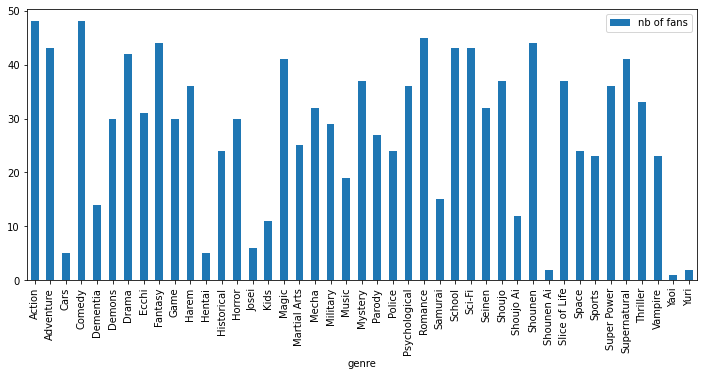

In [37]:
plot_stats = stats_genre.plot(kind="bar", figsize=(12,5))
plot_stats

In [38]:
# And we can put the plot to Excel ... as a PICTURE🖼️ !
top_left = sheet_genre.range("G4")
sheet_genre.pictures.add(
    plot_stats.get_figure(),
    name="Stats about genres",
    update=True,
    left=top_left.left,
    top=top_left.top,
)


<Picture 'Stats about genres' in <Sheet [rating_anime.xlsx]genre>>

# THE END 🔚

## Any question? 😴😕😱😮🧐😵🤔😷